In [29]:
using DataFrames, CSV
using Statistics
using PlotlyJS
using LaTeXStrings

In [2]:
function read_results_as_df(dir, feature_name)
    files = readdir(dir)
    filter!(x -> endswith(x, ".csv"), files)
    df = DataFrame(Symbol("Node Features") => String[], Symbol("Solution Size") => Real[])
    for file in files
        df_tmp = DataFrame(CSV.File(joinpath(dir,file)))
        push!(df, (   
                feature_name,
                mean(df_tmp.Avg)
                )
            )
    end
    df
end

read_results_as_df (generic function with 1 method)

In [43]:
df_d_S = DataFrame(CSV.File(joinpath("V200_045-055", "results-d_S.csv")))
mean_ds = mean(df_d_S.Avg)

13.73

In [52]:
df_d_S_2 = DataFrame(CSV.File(joinpath("V200_045-055", "results-d_S-2.csv")))
mean_ds_2 = mean(df_d_S_2.Avg)

13.89

In [61]:
df_d_S_3 = DataFrame(CSV.File(joinpath("V200_045-055", "results-d_S-3.csv")))
mean_ds_3 = mean(df_d_S_3.Avg)

14.0

In [3]:
function get_features(dir)
    single_features = [
        ("$dir/Degree/1/", "D"),
        ("$dir/EgoNet1/1/", "E1"),
        ("$dir/Node2Vec_2_4/1/", "N2V"),
        ("$dir/Struct2Vec/1/", "S2V"),
    ]   

    combined_features = [
        ("$dir/Degree-Node2Vec_2_4/1/", "D+N2V"),
        ("$dir/Degree-Struct2Vec/1/", "D+S2V"),
        ("$dir/EgoNet1-EgoNet2/1/", "E1+E2"),
        ("$dir/EgoNet1-Node2Vec_2_4/1/", "E1+N2V"),
        ("$dir/EgoNet1-Struct2Vec/1/", "E1+S2V"),
        ("$dir/Node2Vec_2_4-Struct2Vec/1/", "N2V+S2V"),
    ]
    dfs_single = [read_results_as_df(dir, feature_name) for (dir, feature_name) in single_features]
    dfs_combined = [read_results_as_df(dir, feature_name) for (dir, feature_name) in combined_features]
    return (; single=reduce(vcat, dfs_single), combined=reduce(vcat, dfs_combined))
end

get_features (generic function with 1 method)

In [38]:
single_features = [
    ("V200_045-055/Degree/1/", "D"),
    ("V200_045-055/EgoNet1/1/", "E1"),
    ("V200_045-055/Node2Vec_2_4/1/", "N2V"),
    ("V200_045-055/Struct2Vec/1/", "S2V"),
]

combined_features = [
    ("V200_045-055/Degree-Node2Vec_2_4/1/", "D+N2V"),
    ("V200_045-055/Degree-Struct2Vec/1/", "D+S2V"),
    ("V200_045-055/EgoNet1-EgoNet2/1/", "E1+E2"),
    ("V200_045-055/EgoNet1-Node2Vec_2_4/1/", "E1+N2V"),
    ("V200_045-055/EgoNet1-Struct2Vec/1/", "E1+S2V"),
    ("V200_045-055/Node2Vec_2_4-Struct2Vec/1/", "N2V+S2V"),
]
;

In [35]:
dfs_single = [read_results_as_df(dir, feature_name) for (dir, feature_name) in single_features]
dfs_single = reduce(vcat, dfs_single)
;

In [16]:
add_line(p, y_val, len) = add_shape!(p, line(
    x0=-1, y0=y_val,
    x1=len, y1=y_val,
    line=attr(color="Black", width=1, dash="dash")
))

add_line (generic function with 1 method)

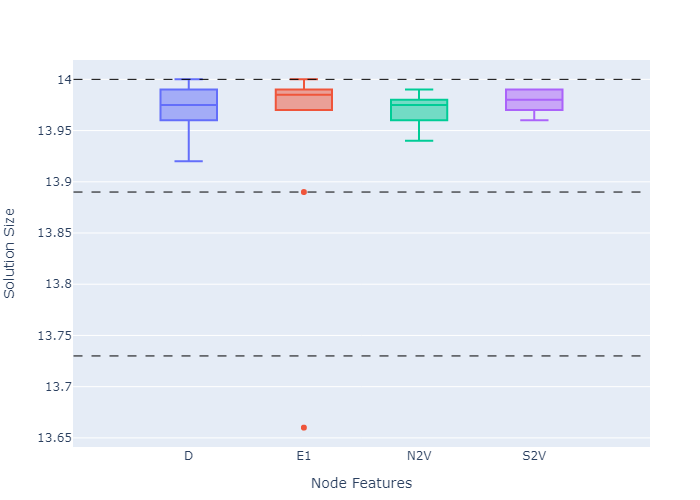

In [63]:
p = plot(dfs_single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
add_line(p, mean_ds, 4)
add_line(p, mean_ds_2, 4)
add_line(p, mean_ds_3, 4)
p

In [39]:
dfs_combined = [read_results_as_df(dir, feature_name) for (dir, feature_name) in combined_features]
dfs_combined = reduce(vcat, dfs_combined)
;

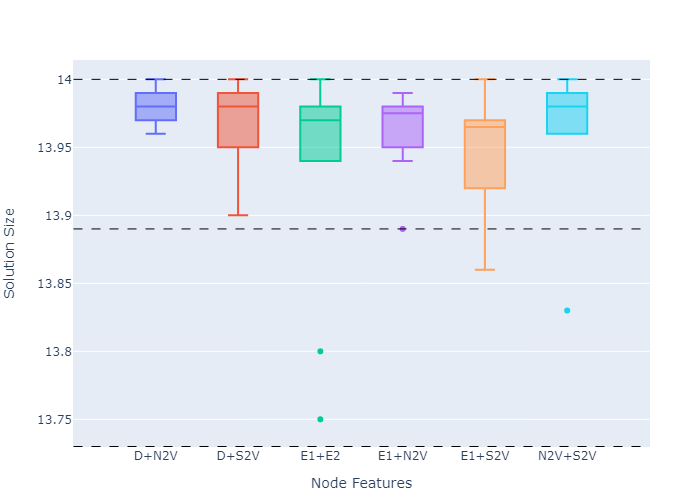

In [62]:
p = plot(dfs_combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
    add_line(p, mean_ds, 6)
    add_line(p, mean_ds_2, 6)
    add_line(p, mean_ds_3, 6)
p

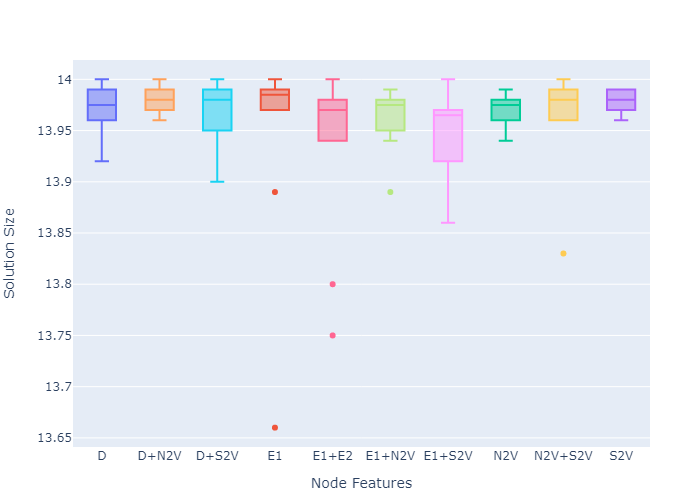

In [44]:
features = get_features("V200_045-055")
p = plot(vcat(features.single, features.combined), x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
    # add_line(p, mean_ds, 10)
    # add_line(p, mean_ds_2, 10)
    # add_line(p, mean_ds_3, 10)
savefig(p, "V200-045-055.pdf", width=1000, height=500)
p

In [67]:
single_features = [
    ("V400_045-055/Degree/1/", "D"),
    ("V400_045-055/EgoNet1/1/", "E1"),
    ("V400_045-055/Node2Vec_2_4/1/", "N2V"),
    ("V400_045-055/Struct2Vec/1/", "S2V"),
]

combined_features = [
    ("V400_045-055/Degree-Node2Vec_2_4/1/", "D+N2V"),
    ("V400_045-055/Degree-Struct2Vec/1/", "D+S2V"),
    ("V400_045-055/EgoNet1-EgoNet2/1/", "E1+E2"),
    ("V400_045-055/EgoNet1-Node2Vec_2_4/1/", "E1+N2V"),
    ("V400_045-055/EgoNet1-Struct2Vec/1/", "E1+S2V"),
    ("V400_045-055/Node2Vec_2_4-Struct2Vec/1/", "N2V+S2V"),
]
;

dfs_single = [read_results_as_df(dir, feature_name) for (dir, feature_name) in single_features]
dfs_single = reduce(vcat, dfs_single)
dfs_combined = [read_results_as_df(dir, feature_name) for (dir, feature_name) in combined_features]
dfs_combined = reduce(vcat, dfs_combined)
;


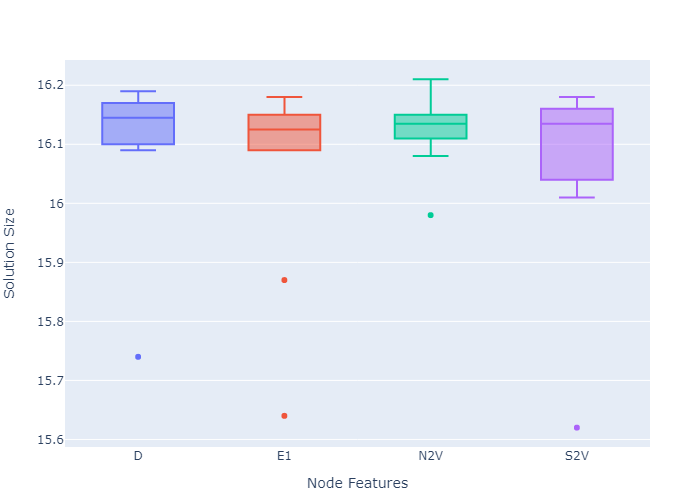

In [68]:
p = plot(dfs_single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
p

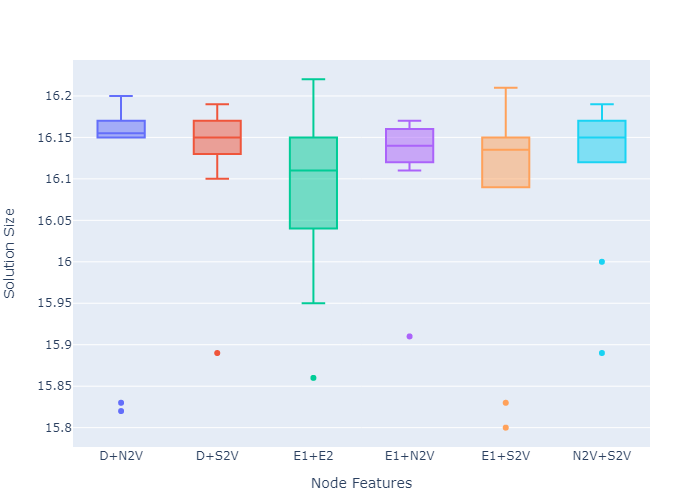

In [69]:
p = plot(dfs_combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
p

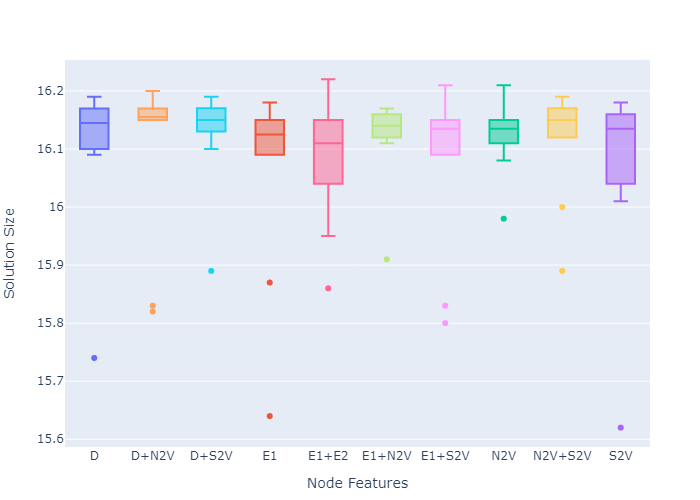

In [70]:
p = plot(vcat(dfs_single, dfs_combined), x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
p

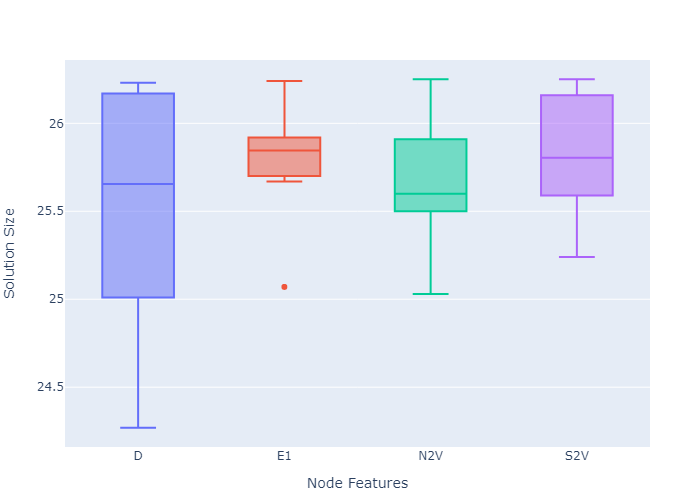

In [37]:
features = get_features("V400_06-07")
p1 = plot(features.single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))



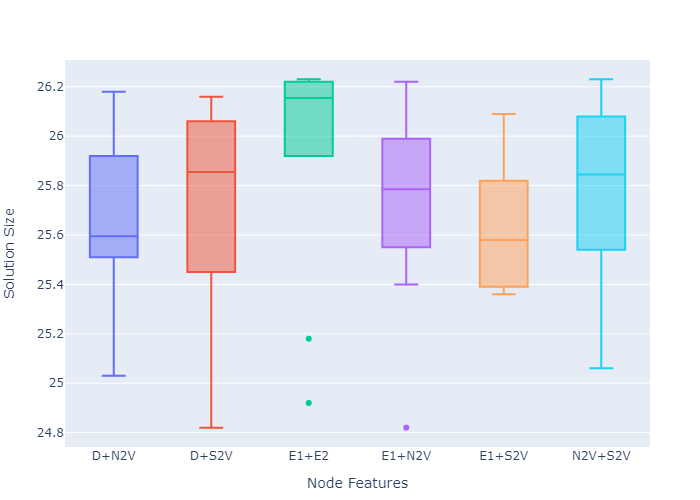

In [12]:
p2 = plot(features.combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))

In [14]:
df_d_S = DataFrame(CSV.File(joinpath("V400_06-07", "results-d_S.csv")))
mean_ds = mean(df_d_S.Avg)

25.770000000000003

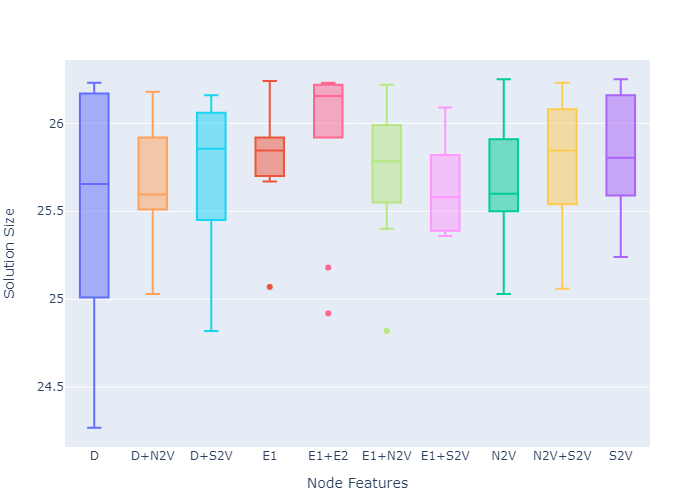

In [38]:
p3 = plot([features.single; features.combined], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
# add_line(p3, mean_ds, 10)
p3

In [40]:
features = get_features("V450-082-0825_k20")
combined = filter(Symbol("Node Features") => !=("E1+E2"), features.combined)
;

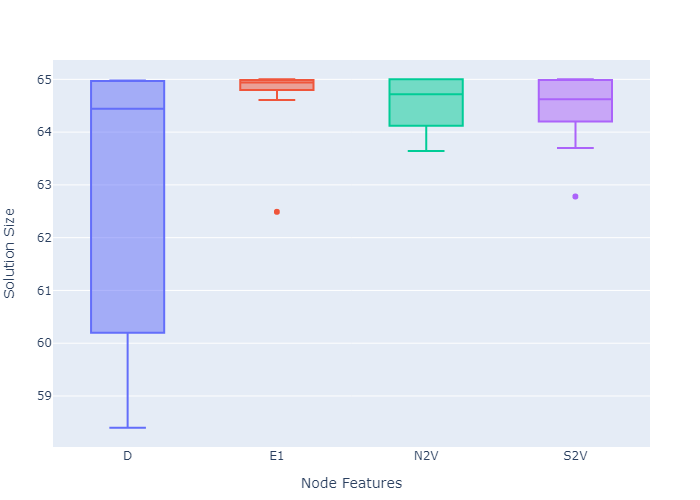

In [18]:
p1 = plot(features.single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))


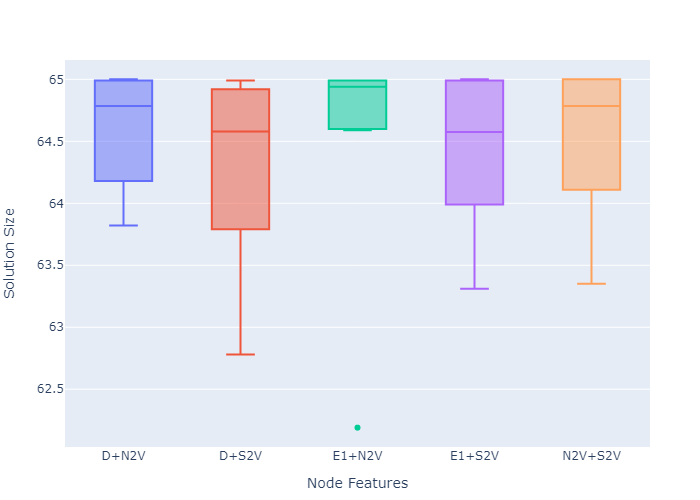

In [19]:
p2 = plot(combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))

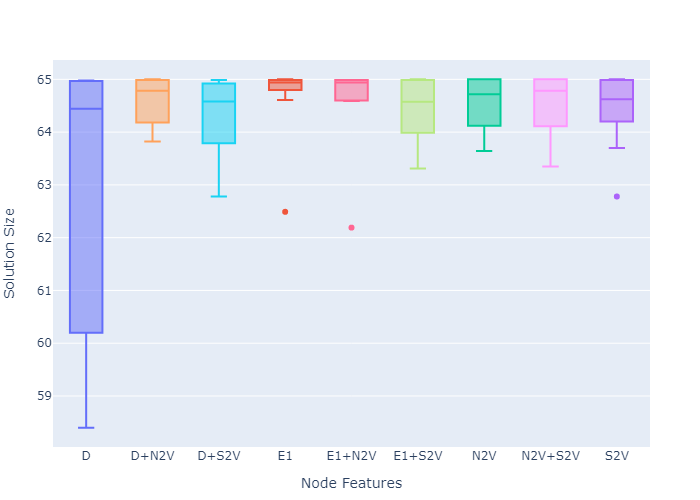

In [42]:
p3 = plot([features.single; combined], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false,
    ))
savefig(p3, "V450-082-0825.pdf", width=1000, height=500)
p3